In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import toeplitz # красивая матрица из scipy

import matplotlib_inline.backend_inline # Для отображения графиков в ячейках ноутбука
plt.rcParams.update({'font.size':10}) # установим значение величины шрифта

In [4]:
v = np.array([ [1, 2, 3] ]).T # Вектор-столбец
w = np.array([ [10, 20] ]) # Вектор-строка
v + w # с помощью транслирования получили матрицу 3х2

array([[11, 21],
       [12, 22],
       [13, 23]])

# Визуализация матриц в виде изображений

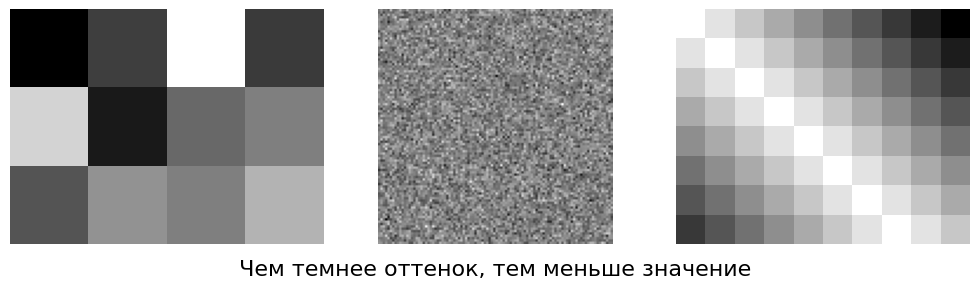

In [53]:
# Создадим несколько матриц
A = np.random.randn(3, 4)
B = np.random.randn(100, 100)
C = -toeplitz(np.arange(8), np.arange(10))

# Покажем их как изображения
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

axs[0].imshow(A, cmap="gray")
axs[1].imshow(B, cmap="gray")
axs[2].imshow(C, cmap="gray")
fig.suptitle(' Чем темнее оттенок, тем меньше значение ', fontsize=16, y = 0)

for i in range(3): 
    axs[i].set_axis_off()
plt.tight_layout()
plt.show()

# Нарезка строк и столбцов

In [41]:
# Создадим матрицу
A = np.reshape(np.arange(1, 10), (3, 3))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [43]:
# Получим n-ую строку

print(A[1, :])

# Вообще для извлечения одной строки необязательно указывать индексы столбцов (:)
print(A[1])
# Однако это может привести к путанице, поэтому предпочтительнее 
# использовать первый вариант

[4 5 6]
[4 5 6]


In [44]:
# Получим n-ый столбец
print(A[:, 1])
# Обратить внамание, что столбец выводится как строка матрицы

[2 5 8]


In [45]:
# Получить несколько строк
A[0:2, :]

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
# Получить несколько столбцов
A[:, 1:]
# Мы видим, что несколько столбцов выводятся как столбцы

array([[2, 3],
       [5, 6],
       [8, 9]])

In [56]:
# Извлечение подматрицы (несколько столбцов и строк)

# Цель: извлечь подматрицу из матрицы А. Матрица А:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]

# Нам нужны строки 0-1 и столбцы 0-1, так:
# [[1 2]
#  [4 5]]

# Кажется, что это должно работать так:
print(A[0:2, 0:2], end="\n\n")

# Однако нельзя забывать, что это срезы (x:y:z, срез от x до y-1 с шагом z (по умолчанию 
# z=1, поэтому в первом случае у нас получился нужный вариант))
print(A[0:2:1, 0:2:1])

[[1 2]
 [4 5]]

[[1 2]
 [4 5]]


In [60]:
# пример из книги

# Полная матрица
A = np.arange(60).reshape(6, 10)

# Подматрица
sub = A[1:4:1, 0:5:1]

# Напечатаем результат
print("Начальная матрица:\n")
print(A)

print("\nПодматрица:\n")
print(sub)

Начальная матрица:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]

Подматрица:

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


# Специальные матрицы

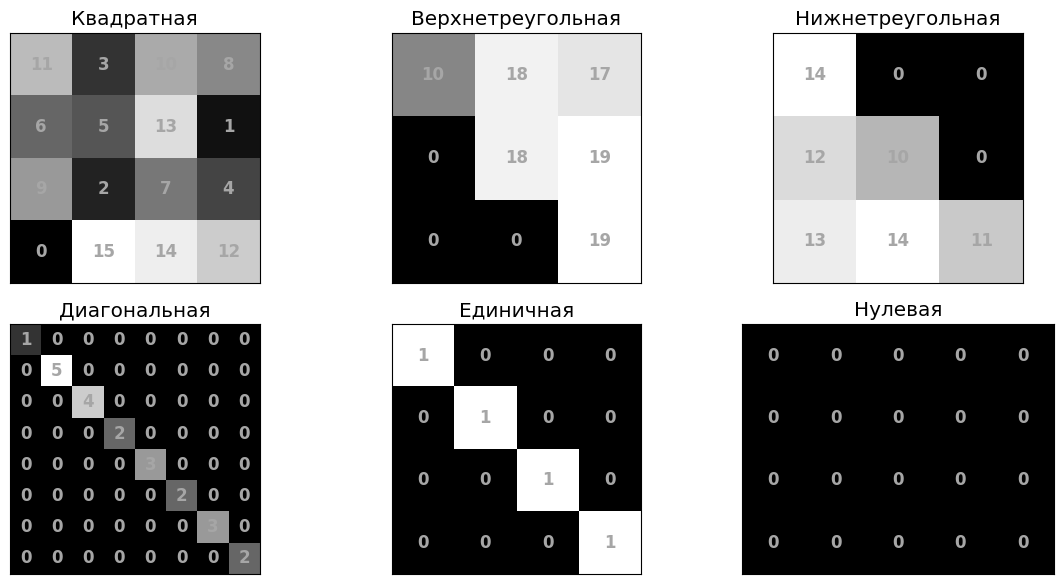

In [88]:
# Создадим матрицы

# Квадратная
M1 = np.random.permutation(16).reshape(4,4)

# Верхнетреугольная матрица
M2 = np.triu(np.random.randint(10, 20, (3,3)))

# Нижнетреугольная матрица
M3 = np.tril(np.random.randint(8, 16, (3,3)))

# Диагональная матрица
M4 = np.diag(np.random.randint(0, 6, size=8))

# Единичная матрица
M5 = np.eye(4, dtype=int)

# Матрица нулей
M6 = np.zeros((4, 5), dtype=int)

# Отрисуем их
matrices = [M1, M2, M3, M4, M5, M6]
matLabels = ["Квадратная", "Верхнетреугольная", "Нижнетреугольная", 
             "Диагональная", "Единичная", "Нулевая"]

_,axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.flatten()

for mi, M in enumerate(matrices):
    axs[mi].imshow(M, cmap="gray", origin="upper",
                  vmin=np.min(M), vmax=np.max(M))
    axs[mi].set(xticks=[], yticks=[])
    axs[mi].set_title(matLabels[mi])

    # Текстовые метки внутри яцеек
    for (j, i), num in np.ndenumerate(M):
        axs[mi].text(i, j, num, color=[0.65, 0.65, 0.65], ha="center", va="center",
                     fontweight="bold")
plt.tight_layout()
plt.show()

# Еще немного о специальных матрицах

In [90]:
# Создадим прямоугольную матрицу из рандомных чисел
# Параметры размера матрицы (shape() в Python)
Mrows = 4 # shape 0
Ncols = 6 # shape 1

# Создадим матрицу
A = np.random.randn(Mrows, Ncols)

# Распечатаем матрицу, округлив значения до 3 знака
np.round(A, 3)

array([[-0.378,  1.734,  0.035,  0.287, -0.088, -0.027],
       [-0.437, -0.222,  0.412,  0.362, -0.203, -0.496],
       [ 1.26 ,  0.094,  0.3  ,  1.063, -2.033, -1.388],
       [ 1.244,  0.977, -0.224, -0.903,  1.593,  0.252]])

In [95]:
# Извлечем верхнетреугольную и нижнетреугольную матрицы из данной
M = 4
N = 6
A = np.random.randn(M, N)
print("Исходная матрица: \n")
print(A)

# Верхнетреугольная матрица
print("\n Верхнетреугольная матрица:\n")
print(np.triu(A))

# Нижнетреугольная матрица
print("\n Нижнетреугольная матрица: \n")
print(np.tril(A))

Исходная матрица: 

[[ 0.15310361 -0.30301439 -0.51472339 -1.38420777  1.67884178 -0.27756484]
 [-0.08685959 -1.24160196 -2.17754854 -1.3748604  -0.40858544  1.3955894 ]
 [-1.29513361  0.74765651 -0.65693482 -1.39635537  0.23281225 -0.90802053]
 [-2.02153624  0.73885233 -0.37275319 -0.09243958 -0.75255764 -2.37990311]]

 Верхнетреугольная матрица:

[[ 0.15310361 -0.30301439 -0.51472339 -1.38420777  1.67884178 -0.27756484]
 [ 0.         -1.24160196 -2.17754854 -1.3748604  -0.40858544  1.3955894 ]
 [ 0.          0.         -0.65693482 -1.39635537  0.23281225 -0.90802053]
 [ 0.          0.          0.         -0.09243958 -0.75255764 -2.37990311]]

 Нижнетреугольная матрица: 

[[ 0.15310361  0.          0.          0.          0.          0.        ]
 [-0.08685959 -1.24160196  0.          0.          0.          0.        ]
 [-1.29513361  0.74765651 -0.65693482  0.          0.          0.        ]
 [-2.02153624  0.73885233 -0.37275319 -0.09243958  0.          0.        ]]


In [110]:
# Диагональная матрица
# Введем матрицу для получения ее диагональных элементов
A = np.random.randn(5, 5)
d = np.diag(A)
print("Начальная матрица:")
print(A)
print("\nДиагональные элементы (В виде вектора-строки):")
print(d)

# Далее введем вектор для получения диагональной матрицы!!!
v = np.arange(1, 6)
D = np.diag(v)
print("\n\n\nВходной вектор:")
print(v)
print("\nДиагональная матрица:")
print(D)

Начальная матрица:
[[-1.2200685   0.90601059  0.09953382 -1.36115408  1.7404929 ]
 [-0.67649496 -0.20276885  0.0592267   0.81472257  0.31129124]
 [-1.53335157 -1.81802762  1.52566797 -0.23684145 -1.26525355]
 [-1.3869742  -0.28246293 -0.3073876  -0.5755516   0.77769126]
 [ 0.9612327  -1.24193156 -0.89488214 -0.85683128  0.90790505]]

Диагональные элементы (В виде вектора-строки):
[-1.2200685  -0.20276885  1.52566797 -0.5755516   0.90790505]



Входной вектор:
[1 2 3 4 5]

Диагональная матрица:
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [106]:
# Единичная матрица
# Для создания единичной матрицы указывается только одно число - количесвто элементов на диагонали
n = 4
I = np.eye(n)
print(f'Единичная матрица размера {n}x{n}:\n{I}')

Единичная матрица размера 4x4:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [108]:
# Матрица нулей
# Важно! В отличии от np.random.randn(), где размерность вводится отдельными аргументами, в функции np.zeros() размерность
# вводится одним оргументом в виде кортежа
n = 4
m = 5
Z = np.zeros((n, m))
print(f'Матрица нулей размера {n}x{m}:\n{Z}')

Матрица нулей размера 4x5:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Сложение матриц

In [113]:
A = np.array([ [2, 3, 4],
               [1, 2, 4] ])
B = np.array([ [0, 3, 1],
               [-1, -4, 2] ])

print(A + B)

[[ 2  6  5]
 [ 0 -2  6]]


# Сдвиг матрицы

In [115]:
# не сдвигается; операция транслирования скаляра
3 + np.eye(2)

array([[4., 3.],
       [3., 4.]])

In [120]:
# Сдвиг демонстрируется далее 

# Матрица
A = np.array([ [4, 5, 1],
               [0, 1, 11],
               [4, 9, 7] ])
# Скаляр
s = 6

print("Начальная матрица:")
print(A, end="\n\n")

# Как и в прошлой ячейке это не сдвиг, а транслирование
print("Транслирование матрицы A вектором s")
print(A+s, end="\n\n")

# Это сдвиг
print("Сдвиг:")
print(A + s * np.eye(len(A)))

Начальная матрица:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]

Транслирование матрицы A вектором s
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]

Сдвиг:
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


# Умножение на скаляр

In [121]:
print(A, end="\n\n")
print("A, умноженная на скаляр:")
print(s * A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]

A, умноженная на скаляр:
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]


# Адамарово умножение

In [127]:
# Две случайные матрицы
A = np.random.randn(3, 4)
B = np.random.randn(3, 4)

# Адамарово умножение
print(A * B)

# И это Адамарово умножение
print(np.multiply(A, B))

print(A[0, 0] * B[0, 0] == (A*B)[0,0])
# Это не Адамарово умножение
# print(A@B) (Если разкомментировать - выдаст ошибку)

[[ 0.67030725 -0.91608725  0.21190573 -0.34406645]
 [-1.05920214 -0.15985068 -0.14719597 -0.2452817 ]
 [ 1.03472359 -0.23657583 -0.01336636 -0.43859382]]
[[ 0.67030725 -0.91608725  0.21190573 -0.34406645]
 [-1.05920214 -0.15985068 -0.14719597 -0.2452817 ]
 [ 1.03472359 -0.23657583 -0.01336636 -0.43859382]]
True


# "Стандартное" матричное умножение

In [133]:
# Сначала создадим несколько матриц
A = np.random.randn(3, 6)
B = np.random.randn(6, 4)
C = np.random.randn(6, 4)

# перемножим их и напечатаем их форму
print( (A@B).shape )
print( (np.dot(A, B)).shape )
# print( (B@C).shape ) - ошибка, так как размерности не согласуются
print( (A@C).shape )

(3, 4)
(3, 4)
(3, 4)


In [139]:
# Напоминание

# Это Адамарово произведение (поэлеентное)
print(np.multiply(B, C), end="\n\n")

# Это произведение матриц (стандартное)
print(np.dot(B, C.T), "\n")

# np.dot и @ - одна и та же операция
print(np.dot(B, C.T) - B @ C.T)

[[ 0.06499606  0.37334669 -0.76421193  0.32392458]
 [-0.11575285  0.01203796  1.33082356  0.30501497]
 [-0.14675348 -0.58491747  0.64170588 -0.28055966]
 [ 0.55500988  0.85236016 -0.03328026 -0.41814357]
 [ 0.04948299 -1.84480832 -0.28288139  0.05736905]
 [-1.66391812 -0.02520119  0.9243464  -0.27880461]]

[[-1.94459733e-03  6.99429473e-01 -1.46324350e+00 -1.45250855e+00
  -1.59384923e+00  3.51630924e-01]
 [-2.09973508e+00  1.53212364e+00 -2.12410420e+00  5.81750876e-01
   9.60578072e-01 -2.18640482e+00]
 [ 7.85912653e-01  7.70734912e-01 -3.70524729e-01 -1.37310320e+00
  -9.46531387e-02 -1.63157430e+00]
 [ 9.38947420e-01 -1.81080729e+00  2.22476373e+00  9.55946207e-01
  -2.21542827e-01  2.90903122e+00]
 [ 1.51188106e+00 -1.16678767e+00  3.30120167e-01 -1.27021480e+00
  -2.02083767e+00  9.48351977e-01]
 [ 1.68165146e+00 -4.32886263e-02  1.53595171e+00 -7.35101181e-01
   8.16234284e-01 -1.04357752e+00]] 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]

# Геометрия умножения матрицы на вектор

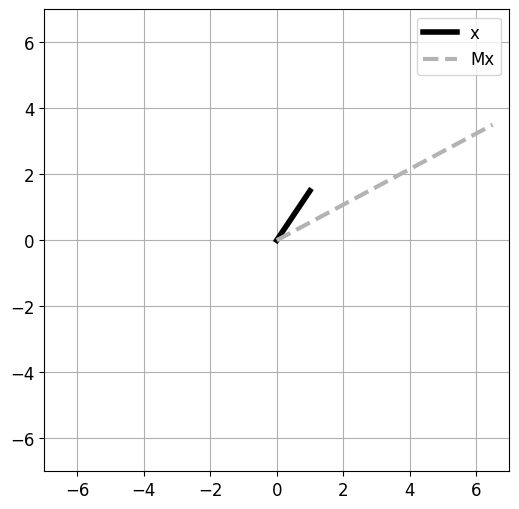

In [151]:
# Матрица и вектор
M = np.array( [[2, 3], [2, 1]] )
x = np.array([ [1, 1.5] ]).T # Получили вектор-столбец из вектора-строки
Mx = M @ x

plt.figure(figsize=(6, 6))

plt.plot([0, x[0, 0]], [0, x[1, 0]], color="k", linewidth=4, label = "x")
plt.plot([0, Mx[0, 0]], [0, Mx[1, 0]], "--", color = [.7, .7, .7], linewidth=3, label="Mx")
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.grid()
plt.legend()
plt.show()

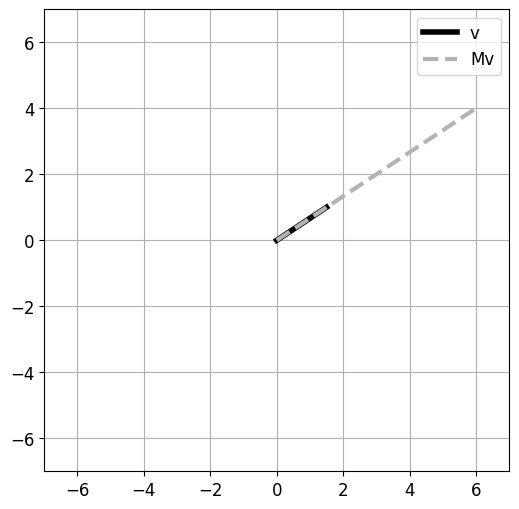

In [155]:
# Второй случай
M = np.array( [[2, 3], [2, 1]] )
v = np.array([ [1.5, 1] ]).T # Получили вектор-столбец из вектора-строки
Mv = M @ v

plt.figure(figsize=(6, 6))

plt.plot([0, v[0,0]], [0, v[1, 0]], "k", linewidth=4, label="v")
plt.plot([0, Mv[0,0]], [0, Mv[1, 0]], "--", color=[.7, .7, .7], linewidth=3, label="Mv")
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.grid()
plt.legend()
plt.show()

# Транспонирование матрицы

In [43]:
# матрица для транспонирования
A = np.array([ [3, 4, 5], [1, 2, 3] ])
print(f'Исходная матрица А:\n{A}')

A_T1 = A.T # Как метод
A_T2 = np.transpose(A) # Как функция

# Двойное транспонирование
A_TT = A_T1.T

# Нарисуем их
print("\n", A_T1, "\n")
print(A_T2, "\n")
print(A_TT, "\n")
# Видим, что оба способа транспонирования приводят к одному и тому же результату

Исходная матрица А:
[[3 4 5]
 [1 2 3]]

 [[3 1]
 [4 2]
 [5 3]] 

[[3 1]
 [4 2]
 [5 3]] 

[[3 4 5]
 [1 2 3]] 



# Упражнения по программированию

### Упражнение 1. Индексация.

In [5]:
# Создадим матрицу 3х4
A = np.arange(12).reshape(3, 4)

# Извлечем элемент из второй строки, четвертого столбца
n = 1
m = 3
a_n_m = A[n, m]

print(f'Элемент матрицы по индексу ({n+1},{m+1}) равен {a_n_m}.')

Элемент матрицы по индексу (2,4) равен 7


### Упражнение 2. Извлечение подматриц. Нарезки.

Начальная матрица:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

Подматрица (первые пять строк и столбцов):
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


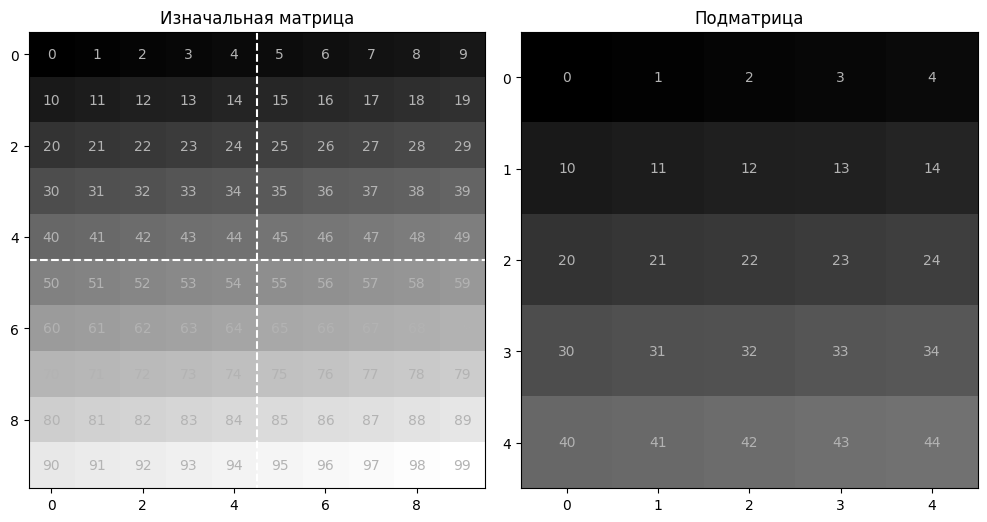

In [80]:
# Создадим матрицу C
C = np.arange(100).reshape(10, 10)

# Извлечем подматрицу 
sub = C[0:5:1, 0:5:1]

# Распечатаем матрицу и подматрицу с помощью print()
print("Начальная матрица:", C, sep="\n")
print("")
print("Подматрица (первые пять строк и столбцов):", sub, sep='\n')

# Визуализируем изначальную матрицу и подматрицу
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(C, cmap="gray", origin="upper", vmin=np.min(C), vmax=np.max(C))
axs[0].set_title("Изначальная матрица")
axs[0].plot([4.5, 4.5], [-0.5, 9.5], "--", color="w")
axs[0].plot([-0.5, 9.5], [4.5, 4.5], "--", color="w")
# Напечатаем значение в каждой яцейки матрицы
for (i, j), num in np.ndenumerate(C):
    axs[0].text(j, i, num, ha='center',
     va='center', color=[.7, .7, .7])

axs[1].imshow(sub, cmap="gray", origin="upper", vmin=np.min(C), vmax=np.max(C))
axs[1].set_title("Подматрица")
for (i, j), num in np.ndenumerate(sub):
    plt.text(j, i, num, va="center", ha = "center", color=[.7, .7, .7])

plt.tight_layout()
plt.show()

### Упражнение 3. Извлечение подматриц. Продолжение.

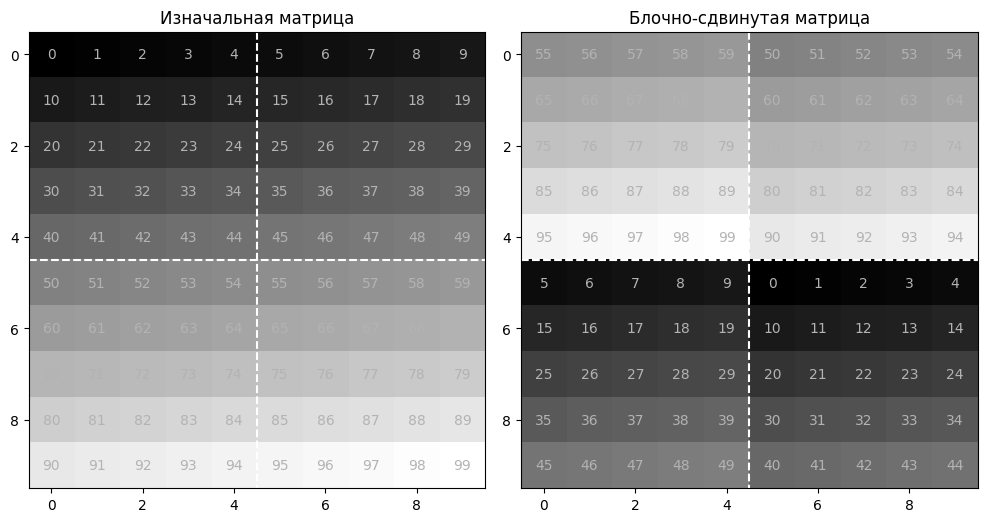

In [82]:
# Извлечем подматрицы, указанные на рисунке в книге
C_1 = C[0:5:1, 0:5:1]
C_2 = C[0:5:1, 5:10:1]
C_3 = C[5:10:1, 0:5:1]
C_4 = C[5:10:1, 5:10:1]

# Для создания блочно-сдвинутой матрицы как на рисунке в учебнике воспользуемся функциями np.hstack() и np.vstack
new_C = np.vstack( (np.hstack( (C_4, C_3) ),
                   np.hstack( (C_2, C_1) ) ) )
# Отрисуем начальную матрицу и блочно-сдвинутую
_, axs = plt.subplots(1, 2, figsize=(10 ,5))

axs[0].imshow(C, cmap="gray", origin="upper", vmin=np.min(C), vmax=np.max(C))
axs[0].set_title("Изначальная матрица")
axs[0].plot([4.5, 4.5], [-.5, 9.5], "w--")
axs[0].plot([-.5, 9.5], [4.5, 4.5], "w--")
for (i, j), num in np.ndenumerate(C):
    axs[0].text(j, i, num, ha='center', va='center', color=[.7, .7, .7])

axs[1].imshow(new_C, cmap="gray", origin="upper", vmin=np.min(new_C), vmax=np.max(new_C))
axs[1].set_title("Блочно-сдвинутая матрица")
axs[1].plot([4.5, 4.5], [-.5, 9.5], "w--")
axs[1].plot([-.5, 9.5], [4.5, 4.5], "w--")
for (i, j), num in np.ndenumerate(new_C):
    axs[1].text(j, i, num, ha='center', va='center', color=[.7, .7, .7])

plt.tight_layout()
plt.show()

### Упражнение 4. Реализация поэлементного сложения матриц.

In [4]:
def addMatrix(A, B):
    # Проверим размеры матриц
    if A.shape != B.shape:
        "Матрицы имеют разные размерности!"
    # Зададим матрицу, в которой будет храниться сумма матриц
    C = np.zeros(A.shape)
    # С помощью цикла найдем сумму матриц
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            C[i, j] = A[i, j] + B[i, j]

    return C

# Протестируем функцию
M1 = np.zeros((6, 4))
M2 = np.ones((6, 4))

addMatrix(M1, M2)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### Упражнение 5. Подтвердить законы коммутативности и дистрибутивности.

In [12]:
# Создадим три матрицы
A = np.random.randn(3, 4)
B = np.random.randn(3, 4)
s = np.random.randn()

# Запишем их линейную комбинацию в виде, указанном в учебнике
sum1 = s * (A + B)
sum2 = s * A + s * B
sum3 = s * B + s * A

# Есть несколько способов проверить трехстороннее равенство
# здесь будем использовать следующую концепцию x=y=z, значит 2x - y - z = 0

print(np.round(2*sum1 - sum2 - sum3, 14))
# Использовали функцию np.round() для округления до 14 знака после запятой, потому что существует погрешность численных методов

[[ 0.  0.  0.  0.]
 [ 0. -0. -0. -0.]
 [-0. -0.  0. -0.]]


### Упражнение 6. Реализация умножения матриц с помощью цикла for. Сравнить с оператором @ в Numpy

In [20]:
def dotMatrix(A, B):
    # Проверим размерности матриц
    if A.shape[1] != B.shape[0]:
        print("Размеры матриц не удовлетворяют критериям для умножению")
    # Зададим заготовку под матрицу
    C = np.zeros((A.shape[0], B.shape[1]))
    for row in range(A.shape[0]):
        for col in range(B.shape[1]):
            C[row, col] = np.dot(A[row, :], B[:, col])
    return C

# Зададим матрицы
n = 4
m = 3
A = np.random.randn(n, m)
B = np.random.randn(m, n)

# Умножение с помощью собственной функции
C1 = dotMatrix(A, B)
# Умножение с помощью @
C2 = A @ B

# Сравниваем результаты используя функцию np.isclose(). Должна получится матрица со значениями True
print(np.isclose(C1, C2))

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


### Упражнение 7. Подтвердить правило LIVE EVIL для транспонирования произведения.

In [28]:
# 1. Создадим четыре матрицы
L = np.random.randn(2, 6)
I = np.random.randn(6, 3)
V = np.random.randn(3, 5)
E = np.random.randn(5, 2)

# 2. Умножим четыре матрицы и транспонируем произведение
res1 = (L @ I @ V @ E).T

# 3. Транспонируем матрицы по отдельности и произведем умножение, не меняя порядка (выдаст ошибку, поэтому закомментирую)
#res2 = L.T @ I.T @ V.T @ E.T

# 4. Транспонируем каждую матрицу и умножим по правилу LIVE EVIL
res3 = E.T @ V.T @ I.T @ L.T

# 5. Покажем что 2 и 4 одинаковы (в пределах вычислительной ошибки)
print(res1 - res3)

# Можно проверить, что 2 и 3 не равны, используя квадратные матрицы
#print(res1 - res2)

[[ 0.0000000e+00  0.0000000e+00]
 [-8.8817842e-16 -8.8817842e-16]]


### Упражнение 8. Реализовать функцию определения симметричности матрицы.

In [29]:
# Создадим функцию
def isMatrixSymmetric(A):
    # Вычислим матрицу расности матрицы A и A.T
    D = A - A.T
    # для учета вычислительной ошибки округления будем отталкиваться от "незначительности" суммы квадратов элементов матрицы D
    sum_sqr = np.sum(D ** 2)
    # Выведем True, если значение sum_sqr меньше e-15, в потивном случае False
    return sum_sqr < 10 ** -15

In [30]:
# Протестируем нашу функцию. Сначала создадим две матрицы (симметричную и нет)
A = np.random.randn(4, 4)
A_sym = A @ A.T

print(isMatrixSymmetric(A))
print(isMatrixSymmetric(A_sym))

False
True


### Упражнение 9. Аддитивный метод создания симметричных матриц.

In [40]:
# Зададим матрицу A
A = np.random.randn(4, 4)
A_symm = (A + A.T) / 2 # Аддитивный метод

# Проверим матрицу с помощью функции, созданной выше
print(isMatrixSymmetric(A))
print(isMatrixSymmetric(A_symm))
# Если задуматься, то можно понять, что делить пополам необязательно

False
True


### Упражнение 10. Линейная комбинация через матричное умножение.

In [42]:
import plotly.graph_objects as go

In [73]:
# Запишем векторы в матрицу (Векторы-столбцы просто конкатенируем)
A = np.array([ [3, 0], [5, 2], [1, 2] ])

# Диапазон изменения скаляров
xlim = [-4, 4]

# Скаляры в виде матрицы
scalars = np.random.uniform(xlim[0], xlim[1], size=(100, 2))

# Зададим форму для векторов
points = np.zeros((100, 3))
for i in range(len(scalars)):
    points[i, :] = A @ scalars[i, :]

# Нарисуем 3D рисунок
fig = go.Figure(data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers',  marker=dict(size=6,color='black'))])
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

In [77]:
# Для линейно зависимых векторов
A_2 = [ [3, 1.5], [5, 2.5], [1, 0.5] ]
# Диапазон изменения скаляров
xlim = [-4, 4]

# Скаляры в виде матрицы
scalars = np.random.uniform(xlim[0], xlim[1], size=(100, 2))

# Зададим форму для векторов
points_2 = np.zeros((100, 3))
for i in range(len(scalars)):
    points_2[i, :] = A_2 @ scalars[i, :]

# Нарисуем 3D рисунок
fig = go.Figure(data=[go.Scatter3d(x=points_2[:,0], y=points_2[:,1], z=points_2[:,2], mode='markers',  marker=dict(size=6,color='black'))])
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

### Упражнение 11. Свойства Диагональных матриц.

In [14]:
# Создадим 3 матрицы 
n = 4
O = np.ones((n,n))
D = np.diag(np.arange(1, n + 1) ** 2)
S = np.sqrt(D)

# Предпозиционно умножим на диагональную матрицу (шкалирование строк)
pre = D @ O

# Постопозиционно умножим на диагональную матрицу (шкалирование столбцов)
post = O @ D

# Умножим с обеих сторон на матрицу S (одновременно шкалируются и строки, и столбцы)
both = S @ O @ S

# Распечатаем результаты
print("Матрица единиц:")
print(O, end='\n\n')

print("Диагональная матрица:")
print(D, end='\n\n')

print("Корень диагональной матрицы:")
print(S, end='\n\n')


print("Предпозиционное умножение на диагональную матрицу:")
print(pre, end='\n\n')

print("Постпозиционное умножение на диагональную матрицу:")
print(post, end='\n\n')

print("Пре- и постозицинное умножение на корень из диагональной матрицы:")
print(both)
# Логично, что получился такой результат: Мы сначала шкалируем строки матрицы, а потом шкалируем столбцы полученной (шкалированной) матрицы

Матрица единиц:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Диагональная матрица:
[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0  9  0]
 [ 0  0  0 16]]

Корень диагональной матрицы:
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]

Предпозиционное умножение на диагональную матрицу:
[[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]

Постпозиционное умножение на диагональную матрицу:
[[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]

Пре- и постозицинное умножение на корень из диагональной матрицы:
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


### Упражнение 12. Умножение диагональных матриц. Сравнение стандартного и Адамарова умножений.

In [19]:
# Создадим две диагональные матрицы
n = 5
D1 = np.diag(np.random.randn(n))
D2 = np.diag(np.random.randn(n))

# Стандартное умножение
standart = D1 @ D2

# Адамарово произведение
adamar = D1 * D2

# Сравним их
print("Равны" if np.all(np.isclose(standart, adamar)) else "Не равны")

Равны
